In [5]:
# IMPORT THE LIBRARIES
!pip install pyforest
from pyforest import *
lazy_imports()

['from sklearn.feature_extraction.text import TfidfVectorizer',
 'import matplotlib.pyplot as plt',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import statsmodels.api as sm',
 'import fastai',
 'from sklearn import svm',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.linear_model import RidgeCV',
 'import matplotlib as mpl',
 'import re',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import Lasso',
 'from sklearn.model_selection import GridSearchCV',
 'import pickle',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.linear_model import LassoCV',
 'import fbprophet',
 'import tqdm',
 'from sklearn.linear_model import Ridge',
 'from xlrd import open_workbook',
 'from dask import dataframe as dd',
 'import os',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import statistics',
 'import plotly.express as px',
 'from openpyxl impo

In [8]:
# LOADING THE DATA
df = pd.read_csv("heart_failure_clinical_records.csv")

<IPython.core.display.Javascript object>

**EXPLORATORY DATA ANALYSIS**

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [9]:
df.shape

(5000, 13)

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [11]:
df.isnull().values.any()

False

In [19]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**VISUALIZATION**

<IPython.core.display.Javascript object>

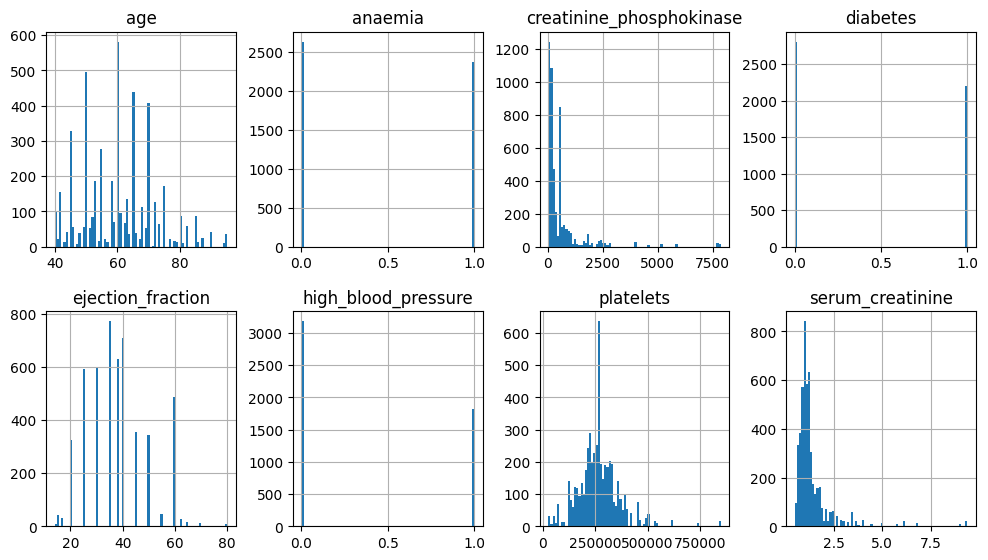

In [13]:
columns = list(df)[0:8]
df[columns].hist(bins=80,figsize=(12,50),layout=(14,4))
plt.show()

In [14]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

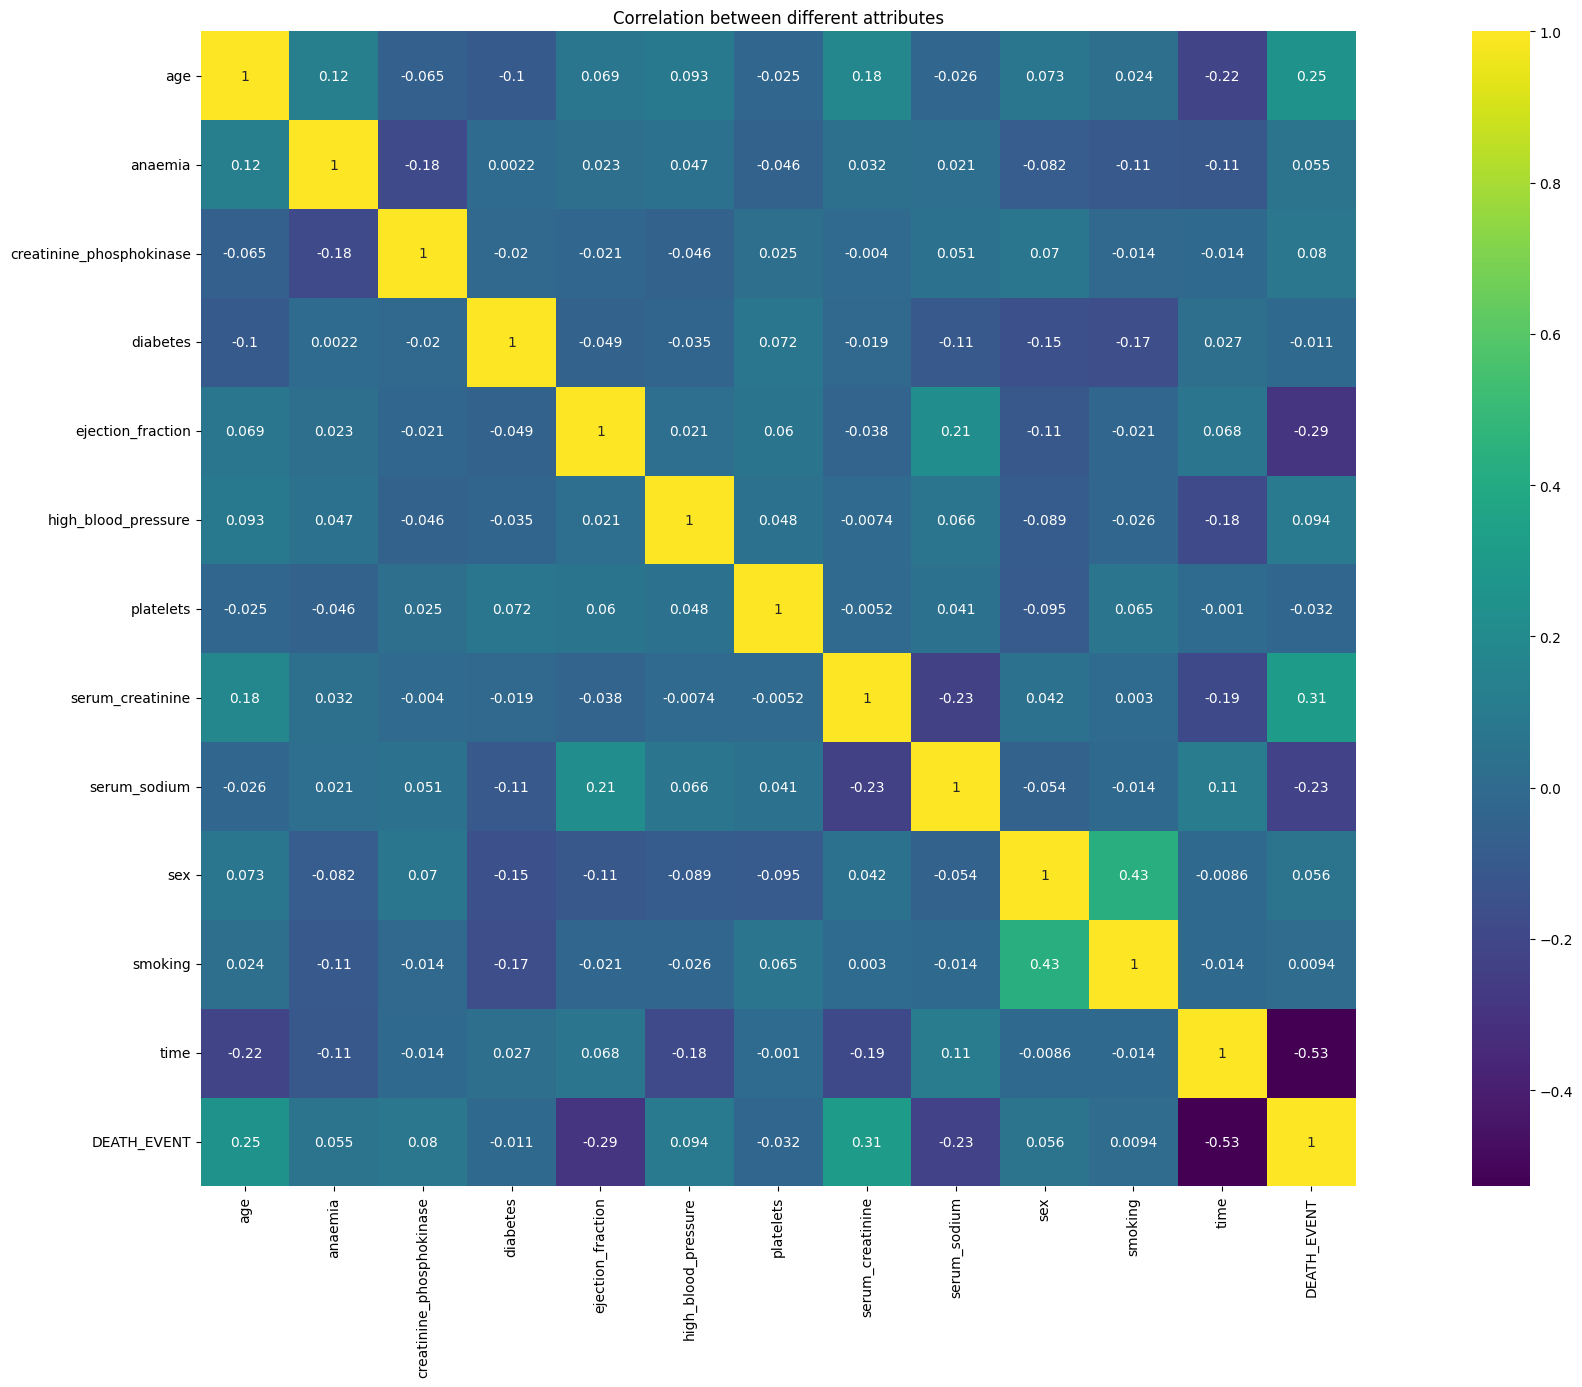

In [15]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Correlation between different attributes")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

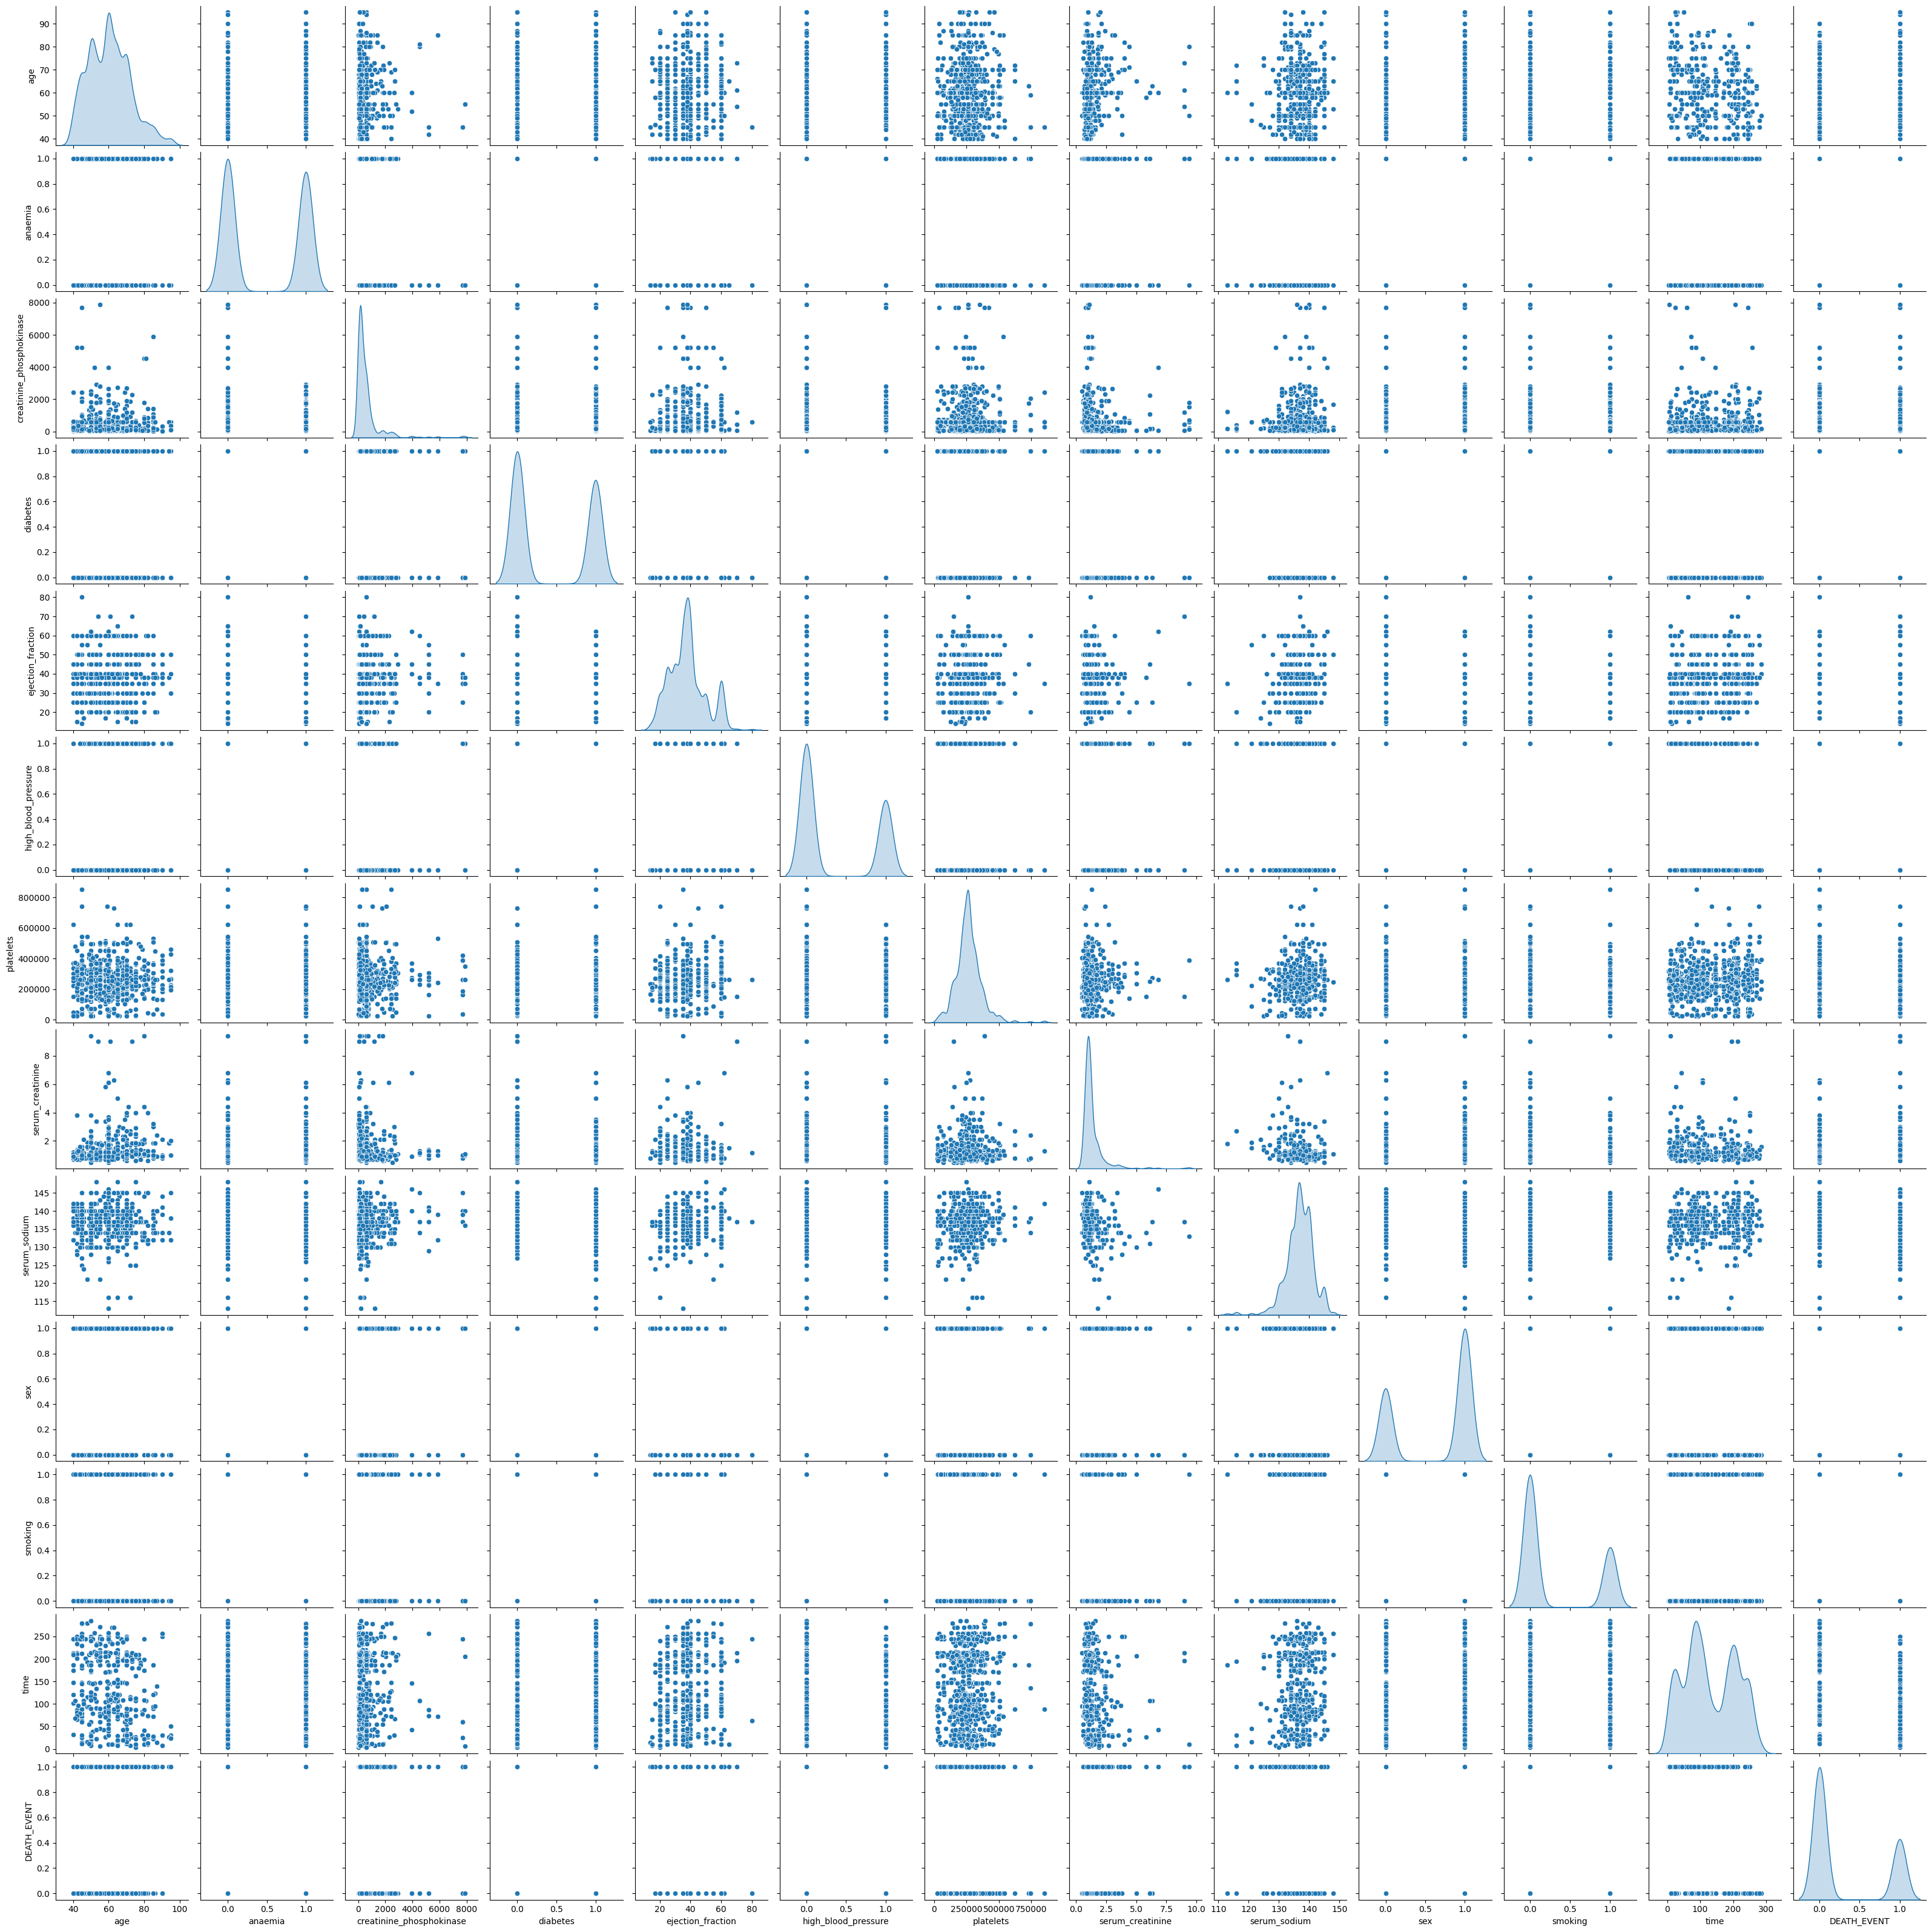

In [16]:
sns.pairplot(df,diag_kind='kde')
plt.show()  # everything at once

In [20]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64

**SPLITTING THE DATA**

In [22]:
from sklearn.model_selection import train_test_split

x = df.drop("DEATH_EVENT",axis=1)
y = df['DEATH_EVENT']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
print("The training set size is {}%".format((len(x_train)/len(df))*100))

The training set size is 70.0%


In [25]:
print("The testing set size is {}%".format((len(x_test)/len(df))*100))

The testing set size is 30.0%


**MODEL BUILDING**

In [28]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "liblinear")
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
model_score = model.score(x_test,y_test)
model_score

0.8573333333333333

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

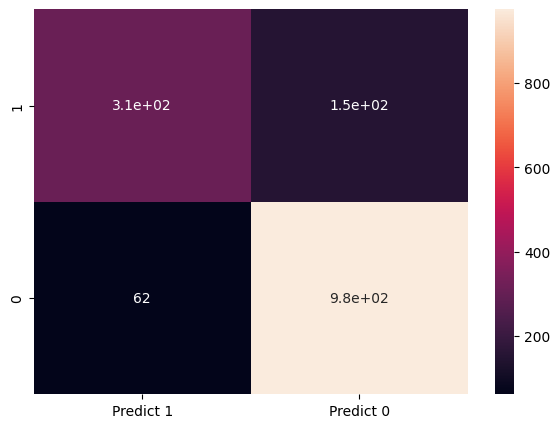

In [31]:
# CONFUSION MATRIX

cm = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])

df_cm = pd.DataFrame(cm , index =[i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)